In [1]:
%load_ext autoreload

# Traces simulator v2

In [2]:
N_USERS = 3

In [3]:
%autoreload
from tracer.simulator import TraceSimulator

sim = TraceSimulator(
    number_towers=400,
    number_users=N_USERS,
    number_cycles=24,
    expander=1,
    sigma=0.0005,
    vel_friction=0.9,
    method='distance_square',
    distance_power=20,
#     verbose=True,
)

## Generate random user traces

In [4]:
sim.generate()

In [5]:
sim.traces.shape

(3, 24)

## Plot generated results

### Towers positions

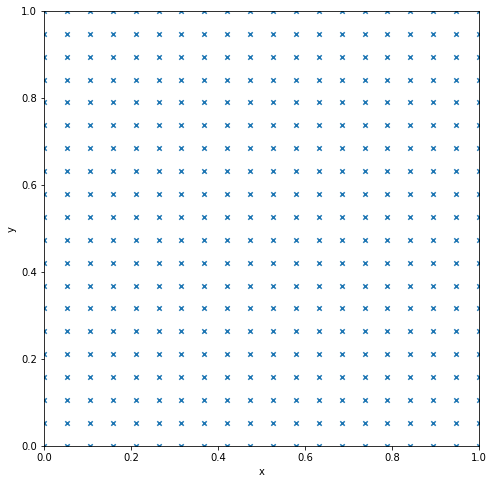

In [6]:
sim.towers_manager.plot_towers(annotate_towers=False);

### User trace

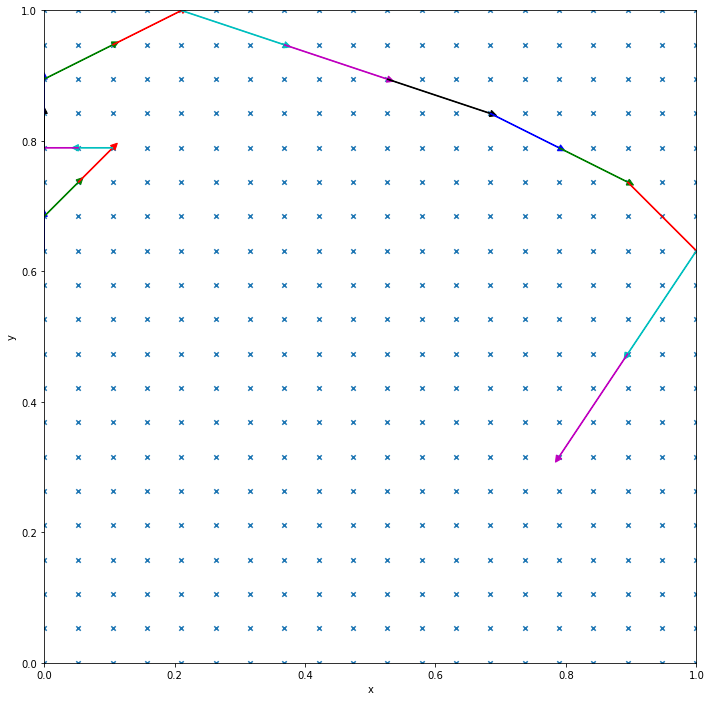

In [7]:
sim.towers_manager.plot_user_trace(sim.traces[2], annotate_towers=False)

In [8]:
sim.aggregated_data.shape

(24, 400)

# Trajectory recovery

In [9]:
%autoreload
import numpy as np
from tracer.recover import TrajectoryRecovery

tr = TrajectoryRecovery(
    number_users=N_USERS,
    towers=sim.towers,
    aggregated_data=sim.aggregated_data,
    vel_friction=0.9
)

In [10]:
tr.build_distribution_matrix()

In [11]:
tr.L.shape

(24, 3)

## Recover trajectories

Recovers the trajectories for each anonymous user and the costs on each step

In [12]:
res = tr.trajectory_recovery_generator()

In [13]:
# res['recovered_costs']

In [14]:
# tr.towers_manager.plot_user_trace(res['recovered_trajectories'][:, 1])

## Map recovered trajectories with real trajectories

global_accuracy = $\frac{1}{N} \sum_{i=1}^N \frac{|T_i \cap Y_i|}{|Y_i|}$

In [15]:
mapping, global_accuracy, acc = tr.map_traces(sim.traces)

In [16]:
global_accuracy

1.0

For each recovered trajectory, see how many elements it has in common with the real one

In [17]:
dict(enumerate(acc))

{0: 24, 1: 24, 2: 24}

User 0 mapped to simulated trace 1


<Figure size 432x288 with 0 Axes>

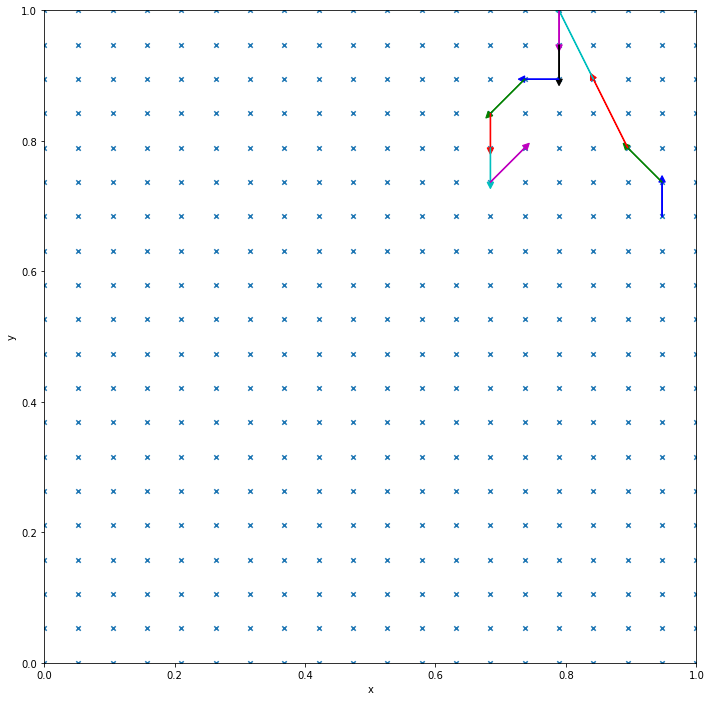

<Figure size 432x288 with 0 Axes>

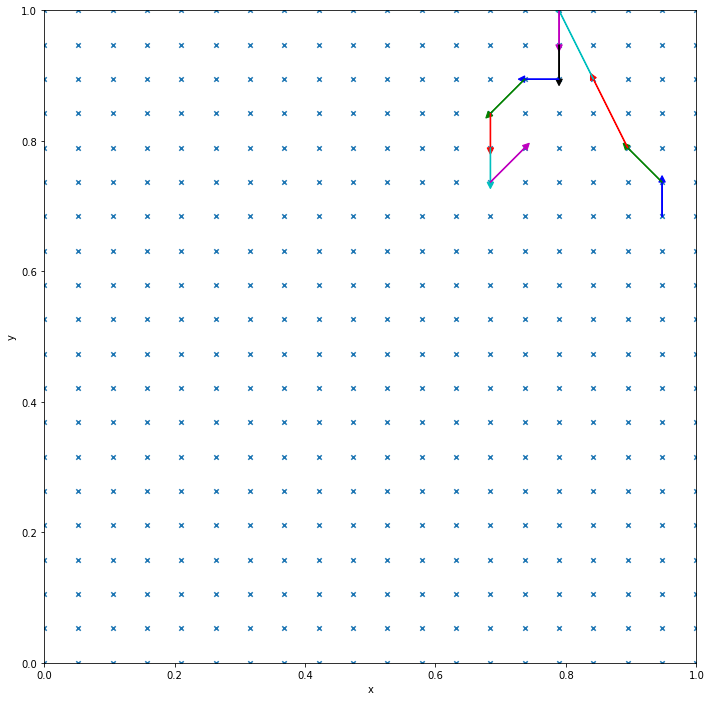

In [19]:
user = 0
recovered_trace = tr.S.T[user]
print(f'User {user} mapped to simulated trace {mapping[user]}')
mapped_trace = sim.traces[mapping[user]]

import matplotlib.pyplot as plt

plt.figure()
tr.towers_manager.plot_user_trace(recovered_trace, annotate_towers=False)

plt.figure()
tr.towers_manager.plot_user_trace(mapped_trace, annotate_towers=False)